# Intelivix - Processo de seleção
**Luiz A. Albuquerque Junior**

Este relatório tem como objetivo a criação de uma máquiba inteligente capaz de classificar trechos de textos opnativos sobre filmes em 5 niveis de sentimento:

*   0 - Negativo 
*   1 - Um pouco negativo
*   2 - Neutro
*   3 - Um pouco positivo
*   4 - Positivo

Assim sendo, veremos as principais técnicas encontradas no mundo acadêmico para processamento de linguagem natural, doravante PLN.

In [3]:
import pandas as pd
from sklearn import tree
import pandas as pd 
import numpy as np
import math
from sklearn.datasets import load_iris
from sklearn import tree
import graphviz 
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
import pickle
from copy import deepcopy
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from xgboost.sklearn import XGBClassifier  
from xgboost.sklearn import XGBRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
#caso deseje trabalhar com o google colab
from google.colab import drive
drive.mount("/content/drive")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Dataset

**Sobre o dataSet**


> O *dataset* consiste em trechos opinativos de filmes com sua respectiva classificação de sentimentos na escala de 0 a 4, onde a menor escala significa Negativo e a maior escala significa Positivo. O dataSet apresenta as seguintes colunas:


*   ID - > O ID (única por instancia)
*   ID Setença -> O ID referente a sentença (não unica)
*   Texto -> trecho opnativo sobre o filme
*   Sentimento -> Valor numérico para indicar quão positivo ou negativo é o trecho






# Análise do dataset


Primeiro verificamos o dataset para termos uma ideia do base de dados que estamos trabalhando.
Nessa análise verificamos:
  1.   O desbalanceamento das classes.
  2.   A quantidade de caracter por instancia(frase).
  3.   O número de palavras por frase
  4.   As palavras mais frequentes
  





In [5]:
#Exibição do dataset
%matplotlib inline
warnings.filterwarnings("ignore")
df = pd.read_csv('/content/drive/My Drive/intelivix/train.tsv', delimiter='\t')
pd.set_option('display.max_colwidth', -1)
df.head(2000)

,Id,IdSentenca,Texto,Sentimento
0,1,1,"A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .",1
1,2,1,A series of escapades demonstrating the adage that what is good for the goose,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
5,6,1,of escapades demonstrating the adage that what is good for the goose,2
6,7,1,of,2
7,8,1,escapades demonstrating the adage that what is good for the goose,2
8,9,1,escapades,2
9,10,1,demonstrating the adage that what is good for the goose,2


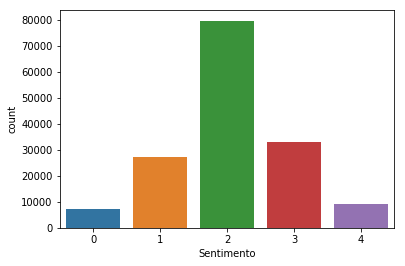

In [0]:
#Histograma sentimentos do dataset
sns.countplot(df['Sentimento'])

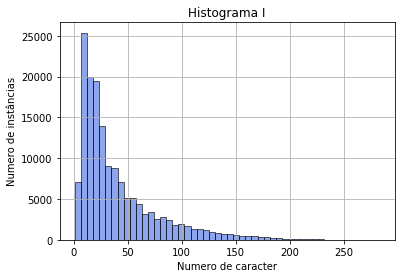

In [0]:
#Quantidade de caracteres por instâncias
df['tamanho'] = df['Texto'].apply(len)
df['tamanho'].hist(bins=50,ec = "k", alpha = .6, color = "royalblue")
plt.title('Histograma I')
plt.ylabel('Numero de instâncias')
plt.xlabel('Numero de caracter')
plt.grid(which='minor')

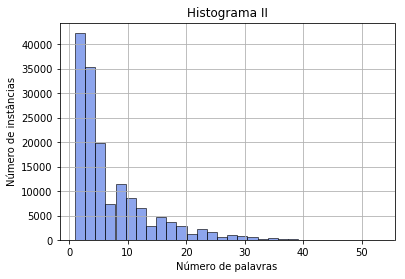

In [0]:
#histograma da quantidade de palavras
totalPalavras = [len(texto.split(" ")) for texto in df['Texto']]
plt.hist(totalPalavras,bins = 30,ec = "k", alpha = .6, color = "royalblue")
plt.title('Histograma II')


plt.ylabel('Número de instâncias')
plt.xlabel('Número de palavras')
plt.grid(which='major')

plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


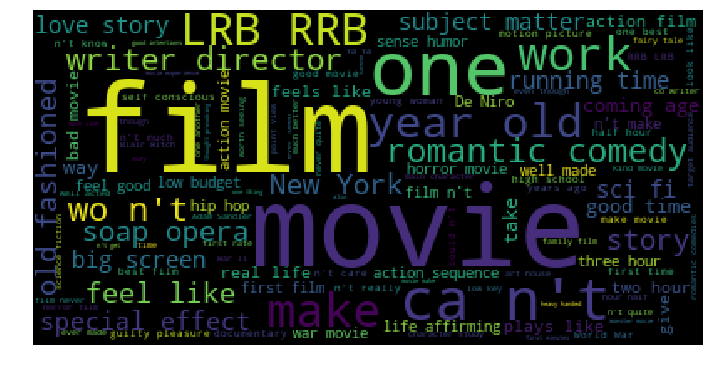

In [0]:
#Palavras mais citadas aparecem em tamanho maior
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud
text = df['Texto'].to_string()
wordcloud = WordCloud(relative_scaling=0.9,stopwords=set(stopwords.words('english'))).generate(text)
plt.figure(figsize=(12,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Pre-processamento dos dados
Nessa etapa realizamos dois importantes passos:


*   A divisao do *dataset* em conjunto de treinamento e conjunto de validação
*   Extração de características do conjunto de treinamento e validação
A extração de caracterisicas se fez com a técnica de "*Tokenization*" na qual consiste em substituir cada palavra por um novo número. Para melhor compreensão veja o exemplo a seguir.
Suponha que seu conjunto de treinamento T seja:


---


T = {
    "Olá meu nome é Luiz" |
    "Qual seu nome" |
    "Meu nome é Albuquerque"
}




---



 Aplicando a técnica teremos:
 

---


 T' = {
    1, 2, 3, 4, 5 |
    6,7,3 |
    2,3,4,8
}
 , onde : 
 Olá = 1 ; meu =2; nome =3; é = 4 Luiz = 5; Qual = 6; seu = 7; Albuquerque = 8

---
Observe que essa abordagem considera as posições das palavras.




In [7]:
#Divisão do dataSet em treino e validação
X = df['Texto']
y = to_categorical(df['Sentimento'])
num_classes = df['Sentimento'].nunique()
np.random.seed(101)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y,random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(124848,) (31212,) (124848, 5) (31212, 5)


In [0]:
#extração de caracteristicas
from keras.preprocessing.text import Tokenizer
global tokenizer
def myTokenizer(X_train,X_test):
  global tokenizer
  max_features = 15000 # Número máximo de palavras ao codificar palavras para números
  tokenizer = Tokenizer(num_words=max_features)
  # tokenizer = Tokenizer(num_words=max_features, lower = False,char_level = True)   ---->  Ver observação
  tokenizer.fit_on_texts(list(X_train))
  return tokenizer.texts_to_sequences(X_train), tokenizer.texts_to_sequences(X_test)

#Observação
#Foi realizado teste no qual o "token" se dava a nivel de letras, ao inves de palavras, porém apresentou uma queda na acurácia
#Acredito que essa queda ocorreu devido ao número de colunas ser maior, pois agora seriam 130 caracteres(colunas) em vez de 30 palavras(colunas)

Do histograma II da seção anterior (Análise do *DataSet*), observamos visualmente que mais de 95% das instancia do DataSet tem no máximo 30 palavras(por instância). Portanto construir uma tabela com 30 colunas (palavras) parece bem aceitável para treinar modelos posteriormente.




In [0]:
from keras.preprocessing import sequence
def mySquence(X_train,X_test):
  max_words = 30 #valor extraido do histograma acima
  return sequence.pad_sequences(X_train, maxlen=max_words),sequence.pad_sequences(X_test, maxlen=max_words)
  #Gera matriz com 30 de largura
  #Exemplo:
  #  Entrada (saída do passo anterior):
  #    [52,231,125]
  #    [3,205]
  #    [5212,61,25,12]
  #  Saída:
  #    [0,0,0,0,0,....,0,0,52,231,125]
  #    [0,0,0,0,0,....,0,0,0,3,205]
  #    [0,0,0,0,0,....,0,5212,61,25,12]

In [0]:
#Extraindo características do dataset com as funçõees já citadas
X_train, X_test = myTokenizer(X_train,X_test)
X_train, X_test = mySquence(X_train,X_test)

A tabela resultante pode ser exibida a seguir:

In [11]:
XX = pd.DataFrame(data = X_train)
XX.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,662,1234
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,33,5,250,89,2,46,53
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,675,2969
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4407,12,121,85,3578
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2079,2680
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2170,7289,2294,38,14,3268,19,12021,66,1,2415,58,3829
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,2,73,130,4,356,232,4,204
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,1,357,4,3082,4,203,3,1,315,44,37,14,240
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,624
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2295


Observe que muito dessas colunas tem o valor zero. Essa propriedade é explorada na biblioteca *scikit-learn* onde recebe o nome de Matriz esparsa, podendo ser melhor manipulada em computadores tradicionais (8 GB de RAM). Mais tarde exploraremos essa propriedade...

#Teste com  Classificadores
Uma vez extraidas as características do *dataset*, ou seja, transformado texto para número, está na hora de testar alguns classificadores bastantes usados em processamento de texto.

**Long short-term memory (LSTM)**

```
# As redes de memória de longo prazo – geralmente chamadas de “LSTMs” – são um tipo especial de RNN, capaz de aprender dependências de longo prazo. Eles foram introduzidos por Hochreiter & Schmidhuber (1997) e foram refinados e popularizados por muitas pessoas no trabalho seguinte.1 Eles funcionam tremendamente bem em uma grande variedade de problemas e agora são amplamente utilizados.
Fonte: Cetax, disponível em https://www.cetax.com.br/blog/compreendendo-lstm-networks/ Junho, 2019
```


Atualmente LSTM é uma das maquinas inteligentes mais eficiente para PLN.

In [0]:
#Funções auxiliares no LSTM
batch_size = 128
epochs = 10
def get_model(max_features, embed_dim):
    np.random.seed(42)
    K.clear_session()
    model = Sequential()
    model.add(Embedding(max_features, embed_dim, input_length=X_train.shape[1]))
    model.add(LSTM(100, dropout=0.15, recurrent_dropout=0.15))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    print(model.summary())
    return model
def model_train(model):
    # Treino do modelo
    global mcp_save    
    earlyStopping = EarlyStopping(monitor='val_acc', patience=2, verbose=1, mode='max')
    adress = '/content/drive/My Drive/intelivix/melhorModelo.hdf5'
    mcp_save = ModelCheckpoint(adress,  monitor='val_acc',save_best_only=True, mode='max',verbose = 1)
    model_history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=2, callbacks=[earlyStopping,mcp_save], validation_data=(X_test, y_test))
    plot_model_history(model_history)
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # Exibindo histórico de acurácia
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Modelo da Acurácia')
    axs[0].set_ylabel('Acuracia')
    axs[0].set_xlabel('Época')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['Treino', 'Validação'], loc='best')
    # Exibindo histórico de loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[0].set_title('Modelo Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Época')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['Treino', 'Validação'], loc='best')
    plt.show()
def model_evaluate(bestModel): 
    y_pred_test =  bestModel.model.predict_classes(X_test, batch_size=batch_size, verbose=0)
    print('Acuracia:\t{:0.1f}%'.format(accuracy_score(np.argmax(y_test,axis=1),y_pred_test)*100))
    print('\n')
    print(classification_report(np.argmax(y_test,axis=1), y_pred_test))
    #confusion matrix
    confmat = confusion_matrix(np.argmax(y_test,axis=1), y_pred_test)
    fig, ax = plt.subplots(figsize=(4, 4))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)   
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.tight_layout()

# Algoritmo I

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 30, 100)           1500000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 505       
Total params: 1,580,905
Trainable params: 1,580,905
Non-trainable params: 0
_________________________________________________________________
None
Train on 124848 samples, validate on 31212 samples
Epoch 1/10
 - 120s - loss: 0.9961 - acc: 0.5986 - val_loss: 0.8471 - val_acc: 0.6533

Epoch 00001: val_acc improved from -inf to 0.65327, saving model to /content/drive/My Drive/intelivix/melhorModelo.hdf5
Epoch 2/10
 - 119s - loss: 0.7832 - acc: 0.6790 - val_loss: 0.8144 - val_acc: 0.6670

Epoch 00002: val_acc improved from 0.65327 to 0.

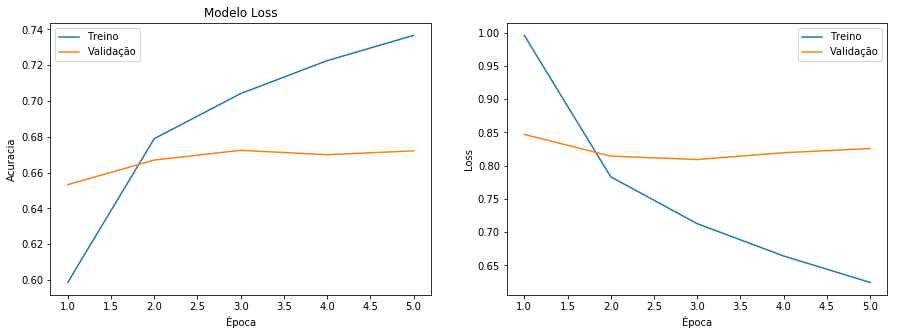

CPU times: user 18min 22s, sys: 46.1 s, total: 19min 8s
Wall time: 9min 53s

Análise do melhor modelo:
Acuracia:	67.2%


              precision    recall  f1-score   support

           0       0.57      0.33      0.42      1414
           1       0.54      0.58      0.56      5455
           2       0.74      0.82      0.78     15916
           3       0.61      0.53      0.57      6586
           4       0.60      0.44      0.51      1841

    accuracy                           0.67     31212
   macro avg       0.61      0.54      0.57     31212
weighted avg       0.67      0.67      0.67     31212



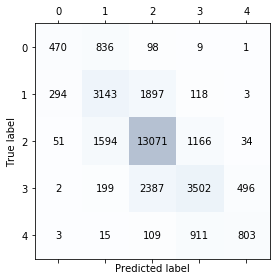

In [0]:
# Usando LSMT -> Algoritmo I 
max_features = 15000
embed_dim = 100
model = get_model(max_features, embed_dim)
%time model_train(model)
# Melhor maquina
print("\nAnálise do melhor modelo:")
adress = '/content/drive/My Drive/intelivix/melhorModelo.hdf5'
model.load_weights(adress)
model_evaluate(model)

**Global Vectors for Word Representation (GloVe)**:
Adicionando a técnica GloVe ao LSTM podemos melhorar um pouco mais a acuracia do classificador.
Tal técnica se baseia fortemente nos significado das palavras de forma a dar uma leve noção de contexto para o classificador.
Para mais detalhe acessar:
[GloVe](https:// https://www.aclweb.org/anthology/D14-1162) disponivel em Junho de 2019

---

Utilizamos os arquivos :

*   glove.6B.100d
*   glove.6B.300d

---


Tais arquivos são facilmente encontrados na rede mundial de computadores, a Internet. Recomendo fortemente a leitura do artigo acima para saber mais sobre a técnica *GloVe*




Found 400000 word vectors.


W0620 02:01:44.614516 140467931989888 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0620 02:01:44.616754 140467931989888 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0620 02:01:44.669979 140467931989888 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0620 02:01:44.672229 140467931989888 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W062

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 30, 100)           1528000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 505       
Total params: 1,608,905
Trainable params: 1,608,905
Non-trainable params: 0
_________________________________________________________________
None
Train on 124848 samples, validate on 31212 samples
Epoch 1/10
 - 113s - loss: 0.9606 - acc: 0.6050 - val_loss: 0.8402 - val_acc: 0.6485

Epoch 00001: val_acc improved from -inf to 0.64847, saving model to /content/drive/My Drive/intelivix/melhorModelo.hdf5
Epoch 2/10
 - 112s - loss: 0.8013 - acc: 0.6671 - val_loss: 0.7973 - val_acc: 0.6663

Epoch 00002: val_acc improved from 0.64847 to 0.

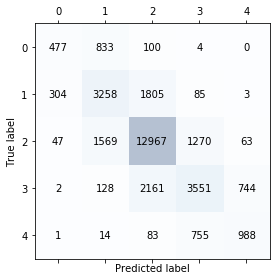

In [0]:
##### Adptação do  Algoritmo I
##### Usando glove.6B.100d.txt
batch_size = 128
epochs = 10
def get_model_glove(max_features, embed_dim, embedding_matrix):
    np.random.seed(42)
    K.clear_session()
    model = Sequential()
    model.add(Embedding(max_features, embed_dim, input_length=X_train.shape[1],weights=[embedding_matrix]))
    model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    print(model.summary())
    return model

def get_coefs(word, *arr):
    return word, np.asarray(arr, dtype='float32')
    
def get_embed_mat(EMBEDDING_FILE, max_features=20000):
    # word vectors
    embeddings_index = dict(get_coefs(*o.rstrip().rsplit(' ')) for o in open(EMBEDDING_FILE, encoding='utf8'))
    print('Found %s word vectors.' % len(embeddings_index))

    # embedding matrix
    word_index = tokenizer.word_index
    num_words = min(max_features, len(word_index) + 1)
    all_embs = np.stack(embeddings_index.values()) #for random init
    embedding_matrix = np.random.normal(all_embs.mean(), all_embs.std(), 
                                        (num_words, embed_dim))
    for word, i in word_index.items():
        if i >= max_features:
            continue
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
    max_features = embedding_matrix.shape[0]
    
    return max_features, embedding_matrix
##### Segundo Algoritmo
EMBEDDING_FILE = '/content/drive/My Drive/intelivix/glove.6B.100d.txt'
adress = '/content/drive/My Drive/intelivix/melhorModelo.hdf5'
embed_dim = 100 #word vector dim
max_features, embedding_matrix = get_embed_mat(EMBEDDING_FILE)
# train the model
model = get_model_glove(max_features, embed_dim, embedding_matrix)
earlyStopping = EarlyStopping(monitor='val_acc', patience=2, verbose=1, mode='max')
mcp_save = ModelCheckpoint(adress,  monitor='val_acc',save_best_only=True, mode='max',verbose = 1)
%time model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=2, callbacks=[earlyStopping,mcp_save], validation_data=(X_test, y_test))
# Melhor maquina
print("\nAnálise do melhor modelo:")
model.load_weights(adress)
model_evaluate(model)


# Algoritmo II

Found 400000 word vectors.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 30, 300)           4584000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 300)               721200    
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 1505      
Total params: 5,306,705
Trainable params: 5,306,705
Non-trainable params: 0
_________________________________________________________________
None
Train on 124848 samples, validate on 31212 samples
Epoch 1/10
 - 637s - loss: 0.9006 - acc: 0.6270 - val_loss: 0.8086 - val_acc: 0.6635

Epoch 00001: val_acc improved from -inf to 0.66346, saving model to /content/drive/My Drive/intelivix/melhorModelo.hdf5
Epoch 2/10
 - 629s - loss: 0.7455 - acc: 0.6906 - val_loss: 0.7741 - val_acc: 0.6775

Epoch 00002: val_acc 

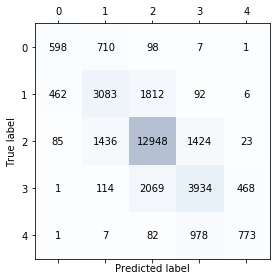

In [0]:
##### Adptação do  Algoritmo II
##### Usando glove.6B.300d.txt
batch_size = 128
epochs = 10
def get_model_glove(max_features, embed_dim, embedding_matrix):
    np.random.seed(42)
    K.clear_session()
    model = Sequential()
    model.add(Embedding(max_features, embed_dim, input_length=X_train.shape[1],weights=[embedding_matrix]))
    model.add(LSTM(300, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    print(model.summary())
    return model

def get_coefs(word, *arr):
    return word, np.asarray(arr, dtype='float32')
    
def get_embed_mat(EMBEDDING_FILE, max_features=20000):
    # word vectors
    embeddings_index = dict(get_coefs(*o.rstrip().rsplit(' ')) for o in open(EMBEDDING_FILE, encoding='utf8'))
    print('Found %s word vectors.' % len(embeddings_index))

    # embedding matrix
    word_index = tokenizer.word_index
    num_words = min(max_features, len(word_index) + 1)
    all_embs = np.stack(embeddings_index.values()) #for random init
    embedding_matrix = np.random.normal(all_embs.mean(), all_embs.std(), 
                                        (num_words, embed_dim))
    for word, i in word_index.items():
        if i >= max_features:
            continue
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
    max_features = embedding_matrix.shape[0]
    
    return max_features, embedding_matrix
# embedding matrix
EMBEDDING_FILE = '/content/drive/My Drive/intelivix/glove.6B.300d.txt'
adress = '/content/drive/My Drive/intelivix/melhorModelo.hdf5'
embed_dim = 300 #word vector dim
max_features, embedding_matrix = get_embed_mat(EMBEDDING_FILE)
# train the model
model = get_model_glove(max_features, embed_dim, embedding_matrix)
earlyStopping = EarlyStopping(monitor='val_acc', patience=2, verbose=1, mode='max')
mcp_save = ModelCheckpoint(adress,  monitor='val_acc',save_best_only=True, mode='max',verbose = 1)
%time model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=2, callbacks=[earlyStopping,mcp_save], validation_data=(X_test, y_test))
# Melhor maquina
print("\nAnálise do melhor modelo:")
model.load_weights(adress)
model_evaluate(model)



-> **Random Forest Classifier**

In [0]:
clf =  RandomForestClassifier(n_estimators=200,random_state=0)
%time clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


CPU times: user 2min 16s, sys: 2.02 s, total: 2min 18s
Wall time: 2min 18s
              precision    recall  f1-score   support

           0       0.47      0.19      0.27      1414
           1       0.47      0.21      0.29      5455
           2       0.69      0.65      0.67     15916
           3       0.49      0.21      0.30      6586
           4       0.50      0.20      0.29      1841

   micro avg       0.62      0.43      0.51     31212
   macro avg       0.52      0.29      0.36     31212
weighted avg       0.59      0.43      0.48     31212
 samples avg       0.43      0.43      0.43     31212



In [0]:
#Divisão do dataSet em treino e validação
X = df['Texto']
y = df['Sentimento']#Adptação do valor de Y
num_classes = df['Sentimento'].nunique()
np.random.seed(101)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y,random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
#Extraindo características do dataset
X_train, X_test = myTokenizer(X_train,X_test)
X_train, X_test = mySquence(X_train,X_test)

(124686,) (31172,) (124686,) (31172,)


-> **Naive Bayes**

In [0]:

from sklearn.naive_bayes import MultinomialNB
y = df['Sentimento']
clf = MultinomialNB()
%time clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

CPU times: user 50.9 ms, sys: 3 ms, total: 53.9 ms
Wall time: 58.4 ms
              precision    recall  f1-score   support

           0       0.10      0.16      0.12      1414
           1       0.24      0.11      0.15      5454
           2       0.59      0.81      0.68     15879
           3       0.23      0.05      0.08      6584
           4       0.10      0.17      0.12      1841

    accuracy                           0.46     31172
   macro avg       0.25      0.26      0.23     31172
weighted avg       0.40      0.46      0.40     31172



-> **Linear Model**

In [0]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42,max_iter=1000, tol=None)
%time clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

CPU times: user 3min 2s, sys: 21.9 ms, total: 3min 2s
Wall time: 3min 2s
              precision    recall  f1-score   support

           0       0.07      0.06      0.06      1414
           1       0.26      0.05      0.09      5454
           2       0.56      0.69      0.62     15879
           3       0.23      0.29      0.26      6584
           4       0.07      0.05      0.06      1841

    accuracy                           0.43     31172
   macro avg       0.24      0.23      0.22     31172
weighted avg       0.39      0.43      0.39     31172



-> **SVM Linear SVC**


In [0]:
from sklearn import svm
svc = svm.LinearSVC(random_state=42)
%time svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(classification_report(y_test, y_pred))

CPU times: user 2min 39s, sys: 9.9 ms, total: 2min 39s
Wall time: 2min 39s
              precision    recall  f1-score   support

           0       0.05      0.20      0.08      1414
           1       0.26      0.03      0.05      5454
           2       0.54      0.74      0.63     15879
           3       0.24      0.11      0.15      6584
           4       0.11      0.01      0.02      1841

    accuracy                           0.41     31172
   macro avg       0.24      0.22      0.19     31172
weighted avg       0.38      0.41      0.36     31172



**Um pequeno ajuste na extração de caracteristica**

```
Foi utilizado a técnica Stemming e Lemmatization para verificar uma possível melhora do classificador. Tais técnicas consistem em reduzir palavras derivadas em suas palavras raiz(Stem ou lemma). Para melhor entender essas técnicas ver o exemplo a seguir:
 Input                  Stem      Lemma
 Livre (deliver)        livr-     livrer
 Livre (book)           livr-     livre
 Somme (add up)         somm-     sommer 
 Somme (add up)         somm-     somme 
 Coté (quote)           cot-      coter
 Coté (popular)         cot-      coté
 Em caso de dúvida consultar:
 datacamp,https://www.datacamp.com/community/tutorials/stemming-lemmatization-python acessado em junho, 2019.

```











In [0]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer 
from nltk.stem import LancasterStemmer

def lemmatizer(sentence):
  lemmatizer = WordNetLemmatizer()
  word_list = nltk.word_tokenize(sentence)
  lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in word_list])
  return lemmatized_output
def myStemmer(texto):
  word_list = texto.split()
  lancaster=LancasterStemmer()
  stemmer = ' '.join([lancaster.stem(w) for w in word_list])
  return stemmer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


**Aplicando técnica de Lemmatizer** 

In [0]:

df = pd.read_csv('/content/drive/My Drive/intelivix/train.tsv', delimiter='\t')
pd.set_option('display.max_colwidth', -1)
df['Texto'] = df.apply(lambda x: lemmatizer(x['Texto']), axis=1)
df = df[df['Texto'].apply(lambda x: len(x) > 2)]
X = df['Texto']
y = to_categorical(df['Sentimento'])
num_classes = df['Sentimento'].nunique()

np.random.seed(101)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y,random_state=42)
X_train, X_test = myTokenizer(X_train,X_test)
X_train, X_test = mySquence(X_train,X_test)

Found 400000 word vectors.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 30, 100)           1420700   
_________________________________________________________________
lstm_1 (LSTM)                (None, 300)               481200    
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 1505      
Total params: 1,903,405
Trainable params: 1,903,405
Non-trainable params: 0
_________________________________________________________________
None
Train on 124686 samples, validate on 31172 samples
Epoch 1/10
 - 437s - loss: 0.9477 - acc: 0.6083 - val_loss: 0.8405 - val_acc: 0.6529

Epoch 00001: val_acc improved from -inf to 0.65293, saving model to /content/drive/My Drive/intelivix/melhorModelo.hdf5
Epoch 2/10
 - 424s - loss: 0.7977 - acc: 0.6676 - val_loss: 0.7980 - val_acc: 0.6677

Epoch 00002: val_acc 

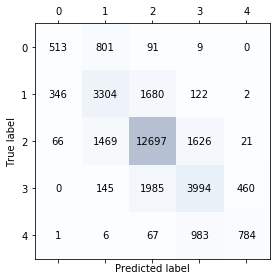

In [0]:
##### Segundo Algoritmo
EMBEDDING_FILE = '/content/drive/My Drive/intelivix/glove.6B.100d.txt'
adress = '/content/drive/My Drive/intelivix/melhorModelo.hdf5'
embed_dim = 100 #word vector dim
max_features, embedding_matrix = get_embed_mat(EMBEDDING_FILE)
# train the model
model = get_model_glove(max_features, embed_dim, embedding_matrix)
earlyStopping = EarlyStopping(monitor='val_acc', patience=2, verbose=1, mode='max')
mcp_save = ModelCheckpoint(adress,  monitor='val_acc',save_best_only=True, mode='max',verbose = 1)
%time model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=2, callbacks=[earlyStopping,mcp_save], validation_data=(X_test, y_test))
# Melhor maquina
print("\nAnálise do melhor modelo:")
model.load_weights(adress)
model_evaluate(model)


**Aplicando técnica de Stemmer** 

In [0]:

df = pd.read_csv('/content/drive/My Drive/intelivix/train.tsv', delimiter='\t')
pd.set_option('display.max_colwidth', -1)
df['Texto'] = df.apply(lambda x: myStemmer(x['Texto']), axis=1)
df = df[df['Texto'].apply(lambda x: len(x) > 2)]
X = df['Texto']
y = to_categorical(df['Sentimento'])
num_classes = df['Sentimento'].nunique()

np.random.seed(101)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y,random_state=42)
X_train, X_test = myTokenizer(X_train,X_test)
X_train, X_test = mySquence(X_train,X_test)

In [0]:
##### Segundo Algoritmo
EMBEDDING_FILE = '/content/drive/My Drive/intelivix/glove.6B.100d.txt'
adress = '/content/drive/My Drive/intelivix/melhorModelo.hdf5'
embed_dim = 100 #word vector dim
max_features, embedding_matrix = get_embed_mat(EMBEDDING_FILE)
# train the model
model = get_model_glove(max_features, embed_dim, embedding_matrix)
earlyStopping = EarlyStopping(monitor='val_acc', patience=2, verbose=1, mode='max')
mcp_save = ModelCheckpoint(adress,  monitor='val_acc',save_best_only=True, mode='max',verbose = 1)
%time model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=2, callbacks=[earlyStopping,mcp_save], validation_data=(X_test, y_test))
# Melhor maquina
print("\nAnálise do melhor modelo:")
model.load_weights(adress)
model_evaluate(model)


Found 400000 word vectors.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 30, 100)           984500    
_________________________________________________________________
lstm_1 (LSTM)                (None, 300)               481200    
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 1505      
Total params: 1,467,205
Trainable params: 1,467,205
Non-trainable params: 0
_________________________________________________________________
None
Train on 124493 samples, validate on 31124 samples
Epoch 1/10
 - 436s - loss: 1.0264 - acc: 0.5804 - val_loss: 0.9042 - val_acc: 0.6280

Epoch 00001: val_acc improved from -inf to 0.62797, saving model to /content/drive/My Drive/intelivix/melhorModelo.hdf5
Epoch 2/10
 - 436s - loss: 0.8550 - acc: 0.6450 - val_loss: 0.8402 - val_acc: 0.6491

Epoch 00002: val_acc 

**Como pode ser observado não houve aumento significativo quando usamos Stemming ou Lemmatization em nosso dataset.**

# Outra abordagem

```
Usando a técnica bag words
Para melhor compreender essa técnica imagine o seguinte dataset
```
T = {


---


"Olá meu nome é Luiz, seu nome é Luiz também?",

---
"Qual seu nome?"


---

"Meu nome é Albuquerque. É um nome bonito"

---

}

```
O conjunto depois de aplicado essa técnica será:
```
T = {


---


"Olá = 1; meu = 1; nome = 2; é = 2; Luiz = 2; seu = 1; também = 1",

---
"Qual  = 1;  seu = 1;  nome = 1'

---

"Meu = 1; nome = 2; é = 2; Albuquerque =1; bonito =1."

---

}

```
Observe que essa técnica não leva em conta as posições das palavras, apenas a quantidade de vezes que cada palavra aparece. Logo:
"Hoje é um belo dia e não irei procastinar"
"Hoje não é um belo dia e irei procastinar"
As duas frases são iguais visto que a codificação para ambas seria:
Hoje = 1; é = 1; um = 1, belo = 1; dia = 1; e = 1; não = 1; irei = 1; procastinar = 1;
A tabela resultante de T é mostrada na célula seguinte





In [0]:
#              |Olá  |  meu  |  nome  |  é  |  Luiz  |  seu  |  também  |  Qual  | Albuquerque  | bonito
#  1º instancia|1    |1      |2       |2    |2       |1      |1         |0       |0             |0
#  2º instancia|0    |0      |1       |0    |0       |1      |0         |1       |0             |0   
#  3º instancia|0    |0      |1       |2    |0       |0      |0         |0       |1             |

# Os valores dentro de cada célula na tabela se refere ao número dee vezes que a mesma aparece na instância, logo a palavra Luiz
# , por exemplo, aparece 2 vezes na 1º instancia e nenhuma vez nas demais instâncias

Uma das vantagens em utilizar tal técnica é o fato dos atributos(colunas) terem sempre o mesmo significado, diferentemente da técnica anterior que cada coluna poderia aparecer qualquer palavra.

In [0]:
dataSetTrain = pd.DataFrame.from_csv('/content/drive/My Drive/intelivix/train.tsv', sep='\t', header=0)

dataSetTrain['Texto'] = dataSetTrain.apply(lambda x: lemmatizer(x['Texto']), axis=1)
#É boa pratica utilizar Stemming ou Lemmatization nessa abordagem.
X = dataSetTrain['Texto'].copy()
Y = dataSetTrain['Sentimento'].copy()
# Dividir base de treinamento em teste e treinamento
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,stratify=Y,random_state=42)

#Teste com  Classificadores
De modo semelhante ao que fizemos anteriormente, uma vez extraídas as características do texto está na hora de analisarmos diferentes tipos de classificadores.

 ->**Linear model SGDClassifier**

In [0]:

text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier(loss='hinge', penalty='l2', random_state=42,max_iter=1000, tol=None)),
])
%time text_clf.fit(X_train, Y_train)  
predicted = text_clf.predict(X_test)

print(classification_report(Y_test, predicted))
   

CPU times: user 2min 6s, sys: 392 ms, total: 2min 6s
Wall time: 2min 6s
              precision    recall  f1-score   support

           0       0.47      0.09      0.15      1414
           1       0.49      0.12      0.19      5455
           2       0.57      0.95      0.71     15917
           3       0.51      0.21      0.30      6585
           4       0.54      0.13      0.21      1841

    accuracy                           0.56     31212
   macro avg       0.52      0.30      0.31     31212
weighted avg       0.54      0.56      0.48     31212



# Algoritmo III

In [0]:
text_clf_RF = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', RandomForestClassifier(n_estimators=100,random_state=0)),
])
%time text_clf_RF.fit(X_train, Y_train)  
predicted = text_clf_RF.predict(X_test)
print(classification_report(Y_test, predicted))

CPU times: user 27min 29s, sys: 280 ms, total: 27min 29s
Wall time: 27min 29s
              precision    recall  f1-score   support

           0       0.45      0.34      0.39      1414
           1       0.56      0.44      0.49      5455
           2       0.70      0.83      0.76     15917
           3       0.56      0.46      0.51      6585
           4       0.50      0.38      0.43      1841

    accuracy                           0.64     31212
   macro avg       0.55      0.49      0.52     31212
weighted avg       0.62      0.64      0.62     31212



->**Random Forest com 15 árvores e n_gram = (1,3)**

```
n_gram indica a quantidade de palavras juntas que o CountVectorizer irá analisar. O algoritmo é o mesmo explicao anteriormente, porém além de criar colunas para palavras o extrator irá criar colunas para 2 ou 3 palavras juntas, dessa forma as frases abaixo serão codificadas diferentemente:
"Hoje é um belo dia e não irei procastinar"
"Hoje não é um belo dia e irei procastinar"

```



In [0]:
from sklearn.ensemble import AdaBoostClassifier
text_clf = Pipeline([
    ('vect', CountVectorizer(ngram_range=(1, 3))),
    ('tfidf', TfidfTransformer()),
    ('clf', RandomForestClassifier(n_estimators=15,random_state=0)),
])
%time text_clf.fit(X_train, Y_train)  
predicted = text_clf.predict(X_test)
print(classification_report(Y_test, predicted))

CPU times: user 26min 42s, sys: 0 ns, total: 26min 42s
Wall time: 26min 42s
              precision    recall  f1-score   support

           0       0.46      0.36      0.41      1414
           1       0.55      0.44      0.49      5455
           2       0.70      0.84      0.76     15917
           3       0.57      0.45      0.50      6585
           4       0.50      0.39      0.44      1841

    accuracy                           0.64     31212
   macro avg       0.56      0.49      0.52     31212
weighted avg       0.62      0.64      0.62     31212



->**Random Forest com 49 árvores e n_gram = (1,3)**

In [0]:
from sklearn.ensemble import AdaBoostClassifier
text_clf = Pipeline([
    ('vect', CountVectorizer(ngram_range=(1, 3))),
    ('tfidf', TfidfTransformer()),
    ('clf', RandomForestClassifier(n_estimators=49,random_state=0)),
])
%time text_clf.fit(X_train, Y_train)  
predicted = text_clf.predict(X_test)
print(classification_report(Y_test, predicted))

CPU times: user 1h 34min 25s, sys: 0 ns, total: 1h 34min 25s
Wall time: 1h 34min 25s
              precision    recall  f1-score   support

           0       0.46      0.36      0.40      1414
           1       0.56      0.44      0.49      5455
           2       0.70      0.84      0.76     15917
           3       0.57      0.45      0.51      6585
           4       0.50      0.39      0.44      1841

    accuracy                           0.64     31212
   macro avg       0.56      0.50      0.52     31212
weighted avg       0.62      0.64      0.63     31212



->**XGBClassifier com 15 árvores e n_gram = (1,3)**

In [0]:
text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf',XGBClassifier())  # and for classifier  
])
%time text_clf.fit(X_train, Y_train)  
predicted = text_clf.predict(X_test)
print(classification_report(Y_test, predicted))

CPU times: user 1min 9s, sys: 43.3 ms, total: 1min 9s
Wall time: 1min 9s
              precision    recall  f1-score   support

           0       0.64      0.04      0.08      1414
           1       0.45      0.07      0.12      5455
           2       0.55      0.96      0.70     15917
           3       0.39      0.14      0.21      6585
           4       0.65      0.05      0.09      1841

    accuracy                           0.54     31212
   macro avg       0.53      0.25      0.24     31212
weighted avg       0.51      0.54      0.43     31212



# Conclusões



Foram testado difentes tipos de algortimos, entre eles podemos citar:
 


1.   **Algoritmo I** : Aplicou-se a técnica de token(utilizando Tokenizer do Keras) para extrair as caracteristicas do texto e em seguida utilizou o  LSMT(também do Keras) como classificador.
2.   **Algoritmo I Adptado** : O Algoritmo I, porém usando a técnica Glove com glove.6B.100d.txt
3.  **Algoritmo II** : O Algoritmo I, porém usando a técnica Glove com glove.6B.300d.txt
4.   **Token_Random Forest:** Aplicou-se a técnica de token(utilizando Tokenizer do Keras) para extrair as caracteristicas do texto e em seguida utilizou o  Random Forest como classificador.
5.   **Token_Naive_Baye:** Aplicou-se a técnica de token(utilizando Tokenizer do Keras) para extrair as caracteristicas do texto e em seguida utilizou o  Naive Baye como classificador.
6.   **Token_Linear_Model:** Aplicou-se a técnica de token(utilizando Tokenizer do Keras) para extrair as caracteristicas do texto e em seguida utilizou o  Linear Model como classificador.
7.   **Algortimo I adptado com lemmatizer: :** Aplicou-se a técnica lemmatizer e em seguida todo Algoritmo I foi repetido
8.   **Algortimo I adptado com LancasterStemmer: :** Aplicou-se a técnica LancasterStemmer e em seguida todo Algoritmo I foi repetido
9.   **Word_bag_Linear_model:** Aplicou-se a técnica de bag word para extrair as caracteristicas do texto e em seguida utilizou o  Linear Model como classificador.
10.   **Algoritmo III:** Aplicou-se a técnica de bag word para extrair as caracteristicas do texto e em seguida utilizou o Random Forest com 100 árvores como classificador.
11.   **word bag Random Forest com 15 árvores n_gram(1,3):** Aplicou-se a técnica de bag word n_gram(1,3) para extrair as caracteristicas do texto e em seguida utilizou o Random Forest com 15 árvores como classificador.
12.   **word bag Random Forest com 49 árvores n_gram(1,3):** Aplicou-se a técnica de bag word n_gram(1,3) para extrair as caracteristicas do texto e em seguida utilizou o Random Forest com 49 árvores como classificador.
13.   **word bag XGBClassifier com 15 árvores:** Aplicou-se a técnica de bag word para extrair as caracteristicas do texto e em seguida utilizou o XGBClassifier com 15 árvores como classificador.


```
OBS: Os nomes algoritmos I II III são os algoritmos escolhidos para o processo seletivo .
A célula seguinte contém os resultados.

```


In [0]:
#ALGORITMO UTILIZADO                                             ACURÁCIA                       TEMPO TREINO
# Algortimo I                                                      67.2%                         9 min
# Algortimo I adptado:                                             68.1%                         32min 29s
# Algortimo II:                                                    68.4%                         1h 3min 14s
# Random Forest                                                    51.0%                         2min 18s
# Naive Bayes:                                                     46.0%                         53.9ms
# Linear Model                                                     43.0%                         3min 2s
# SVM linear SVC                                                   41.0%                         3min 39s
# Algortimo I adptado com lemmatizer:                              68.3%                         1h 48min 34s
# Algortimo I adptado com LancasterStemmer:                        67.8%                         1h 48min 34s
# word bag Linear model SGDClassifier:                             56.0%                         2min 6s
# Algoritmo III:                                                   64.0%                         27min 29s
# word bag Random Forest com 15 árvores n_gram(1,3):               64.0%                         26min 42s
# word bag Random Forest com 49 árvores n_gram(1,3):               64.0%                         1h 34min 25s
# word bag XGBClassifier com 15 árvores n_gram(1,3):               54.0%                         1min 9s


# Validando o resultado com Stratified 10 Fold
Para maior validação do resultado do Algoritmo I realizamos o mesmo experimento com método k-fold para avaliação. E verificamos que o resultado bate com a tabela acima. Infelizmente por falta de tempo não podemos realizar o experimento para os demais algoritmos, mas fico satisfeito com os resultados da tabela.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 30, 100)           1500000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 505       
Total params: 1,580,905
Trainable params: 1,580,905
Non-trainable params: 0
_________________________________________________________________
None
Train on 140451 samples, validate on 15609 samples
Epoch 1/10
 - 116s - loss: 0.9784 - acc: 0.6070 - val_loss: 0.8339 - val_acc: 0.6607

Epoch 00001: val_acc improved from -inf to 0.66071, saving model to /content/drive/My Drive/intelivix/melhorModelo.hdf5
Epoch 2/10
 - 114s - loss: 0.7778 - acc: 0.6809 - val_loss: 0.7920 - val_acc: 0.6754

Epoch 00002: val_acc improved from 0.66071 to 0.

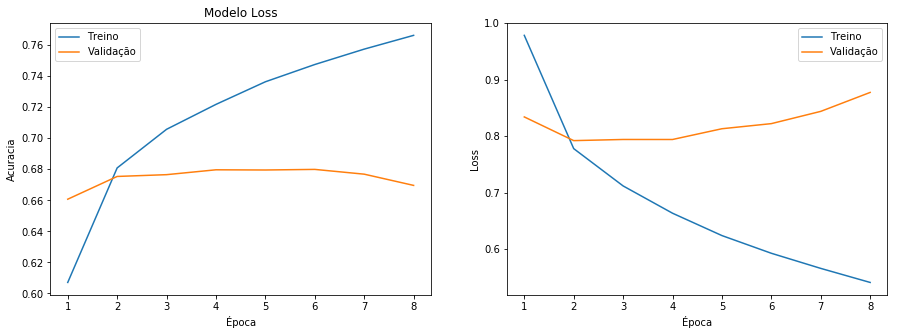

CPU times: user 28min 32s, sys: 1min 20s, total: 29min 52s
Wall time: 15min 27s

Análise do melhor modelo:
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 30, 100)           1500000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 505       
Total params: 1,580,905
Trainable params: 1,580,905
Non-trainable params: 0
_________________________________________________________________
None
Train on 140451 samples, validate on 15609 samples
Epoch 1/10
 - 117s - loss: 0.9793 - acc: 0.6065 - val_loss: 0.8457 - val_acc: 0.6524

Epoch 00001: val_acc improved from -inf to 0.65238, saving model to /content/drive/My Drive/intelivix/melhorModelo.hdf5
Epoch 2/10
 - 116s - loss: 

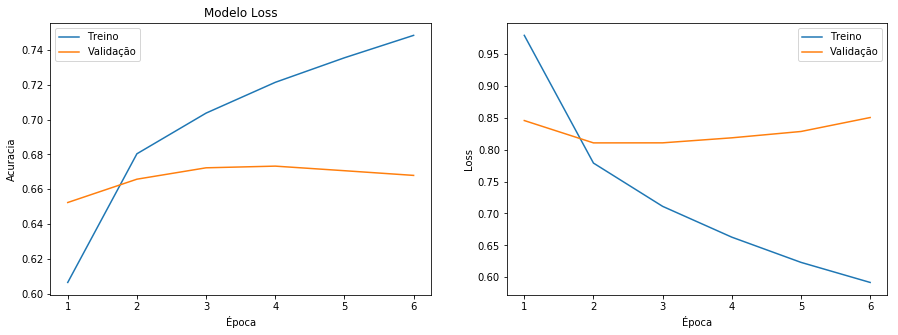

CPU times: user 21min 31s, sys: 1min 1s, total: 22min 33s
Wall time: 11min 41s

Análise do melhor modelo:
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 30, 100)           1500000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 505       
Total params: 1,580,905
Trainable params: 1,580,905
Non-trainable params: 0
_________________________________________________________________
None
Train on 140453 samples, validate on 15607 samples
Epoch 1/10
 - 117s - loss: 0.9808 - acc: 0.6056 - val_loss: 0.8439 - val_acc: 0.6537

Epoch 00001: val_acc improved from -inf to 0.65375, saving model to /content/drive/My Drive/intelivix/melhorModelo.hdf5
Epoch 2/10
 - 116s - loss: 0

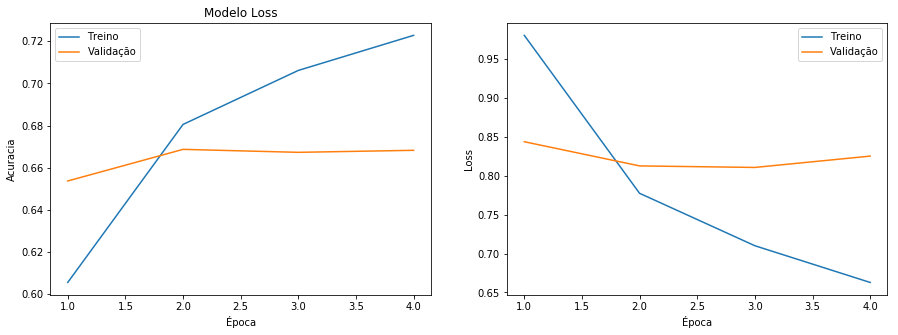

CPU times: user 14min 19s, sys: 40.9 s, total: 15min
Wall time: 7min 46s

Análise do melhor modelo:
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 30, 100)           1500000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 505       
Total params: 1,580,905
Trainable params: 1,580,905
Non-trainable params: 0
_________________________________________________________________
None
Train on 140454 samples, validate on 15606 samples
Epoch 1/10
 - 116s - loss: 0.9803 - acc: 0.6060 - val_loss: 0.8565 - val_acc: 0.6542

Epoch 00001: val_acc improved from -inf to 0.65417, saving model to /content/drive/My Drive/intelivix/melhorModelo.hdf5
Epoch 2/10
 - 116s - loss: 0.7756 

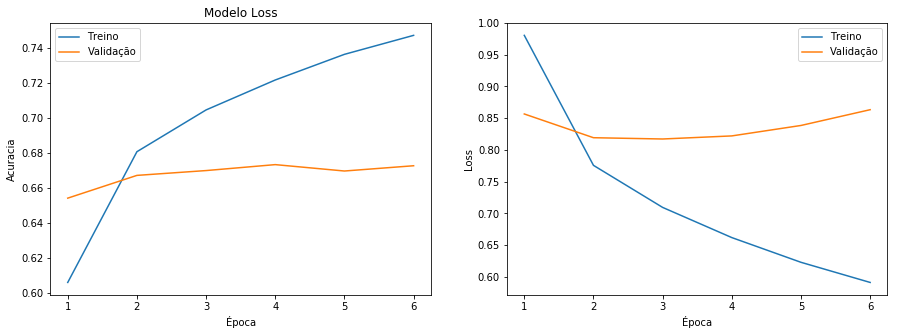

CPU times: user 21min 35s, sys: 59.3 s, total: 22min 34s
Wall time: 11min 40s

Análise do melhor modelo:
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 30, 100)           1500000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 505       
Total params: 1,580,905
Trainable params: 1,580,905
Non-trainable params: 0
_________________________________________________________________
None
Train on 140454 samples, validate on 15606 samples
Epoch 1/10
 - 117s - loss: 0.9791 - acc: 0.6057 - val_loss: 0.8351 - val_acc: 0.6567

Epoch 00001: val_acc improved from -inf to 0.65667, saving model to /content/drive/My Drive/intelivix/melhorModelo.hdf5
Epoch 2/10
 - 116s - loss: 0.

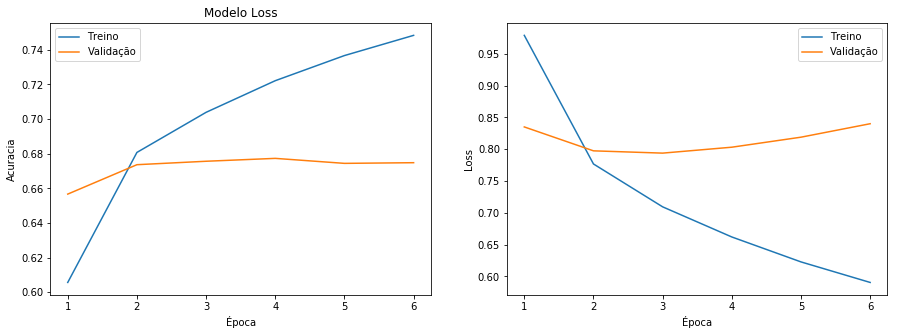

CPU times: user 21min 39s, sys: 1min, total: 22min 39s
Wall time: 11min 43s

Análise do melhor modelo:
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 30, 100)           1500000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 505       
Total params: 1,580,905
Trainable params: 1,580,905
Non-trainable params: 0
_________________________________________________________________
None
Train on 140454 samples, validate on 15606 samples
Epoch 1/10
 - 117s - loss: 0.9799 - acc: 0.6063 - val_loss: 0.8452 - val_acc: 0.6527

Epoch 00001: val_acc improved from -inf to 0.65270, saving model to /content/drive/My Drive/intelivix/melhorModelo.hdf5
Epoch 2/10
 - 116s - loss: 0.77

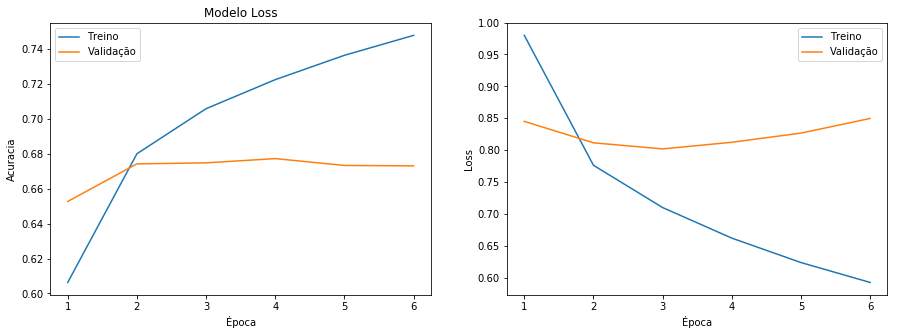

CPU times: user 21min 33s, sys: 59.4 s, total: 22min 32s
Wall time: 11min 40s

Análise do melhor modelo:
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 30, 100)           1500000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 505       
Total params: 1,580,905
Trainable params: 1,580,905
Non-trainable params: 0
_________________________________________________________________
None
Train on 140455 samples, validate on 15605 samples
Epoch 1/10
 - 117s - loss: 0.9792 - acc: 0.6060 - val_loss: 0.8513 - val_acc: 0.6547

Epoch 00001: val_acc improved from -inf to 0.65473, saving model to /content/drive/My Drive/intelivix/melhorModelo.hdf5
Epoch 2/10
 - 116s - loss: 0.

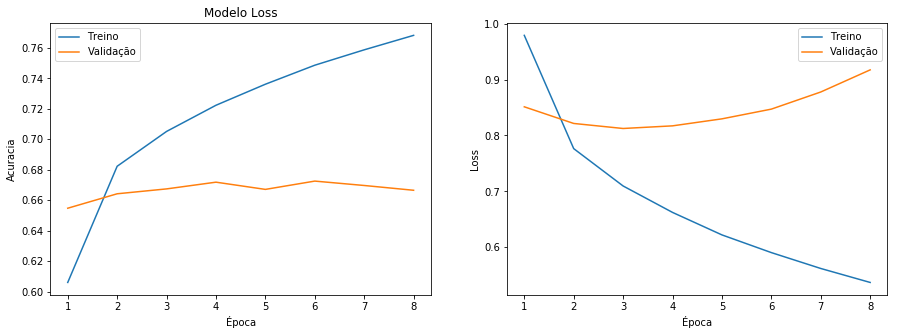

CPU times: user 28min 43s, sys: 1min 23s, total: 30min 7s
Wall time: 15min 36s

Análise do melhor modelo:
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 30, 100)           1500000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 505       
Total params: 1,580,905
Trainable params: 1,580,905
Non-trainable params: 0
_________________________________________________________________
None
Train on 140456 samples, validate on 15604 samples
Epoch 1/10
 - 117s - loss: 0.9807 - acc: 0.6047 - val_loss: 0.8438 - val_acc: 0.6550

Epoch 00001: val_acc improved from -inf to 0.65496, saving model to /content/drive/My Drive/intelivix/melhorModelo.hdf5
Epoch 2/10
 - 117s - loss: 0

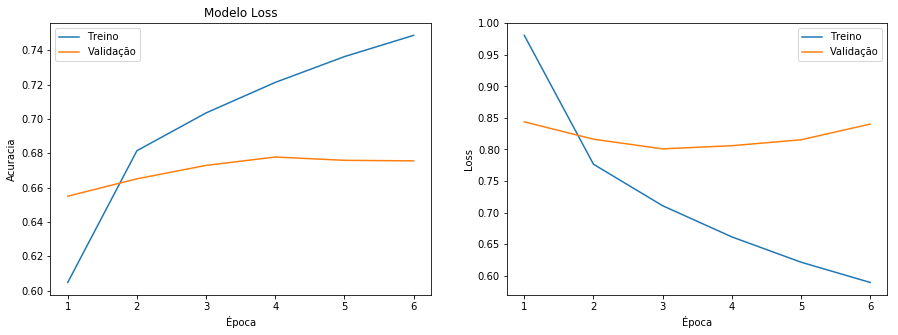

CPU times: user 21min 41s, sys: 1min, total: 22min 41s
Wall time: 11min 45s

Análise do melhor modelo:
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 30, 100)           1500000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 505       
Total params: 1,580,905
Trainable params: 1,580,905
Non-trainable params: 0
_________________________________________________________________
None
Train on 140456 samples, validate on 15604 samples
Epoch 1/10
 - 117s - loss: 0.9789 - acc: 0.6075 - val_loss: 0.8437 - val_acc: 0.6560

Epoch 00001: val_acc improved from -inf to 0.65599, saving model to /content/drive/My Drive/intelivix/melhorModelo.hdf5
Epoch 2/10
 - 117s - loss: 0.77

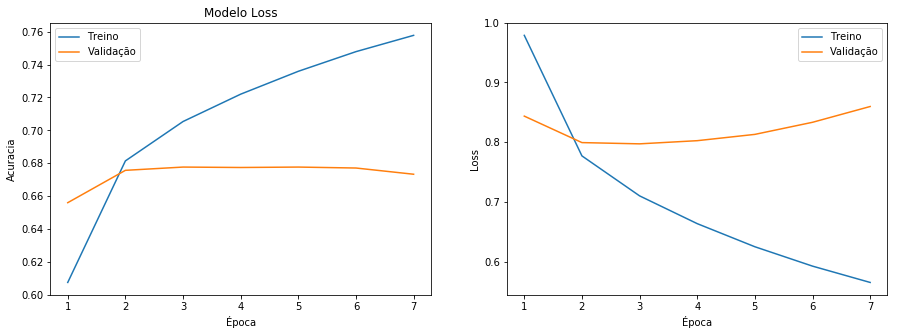

CPU times: user 25min 17s, sys: 1min 9s, total: 26min 27s
Wall time: 13min 41s

Análise do melhor modelo:
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 30, 100)           1500000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 505       
Total params: 1,580,905
Trainable params: 1,580,905
Non-trainable params: 0
_________________________________________________________________
None
Train on 140456 samples, validate on 15604 samples
Epoch 1/10
 - 116s - loss: 0.9764 - acc: 0.6065 - val_loss: 0.8460 - val_acc: 0.6582

Epoch 00001: val_acc improved from -inf to 0.65823, saving model to /content/drive/My Drive/intelivix/melhorModelo.hdf5
Epoch 2/10
 - 115s - loss: 0

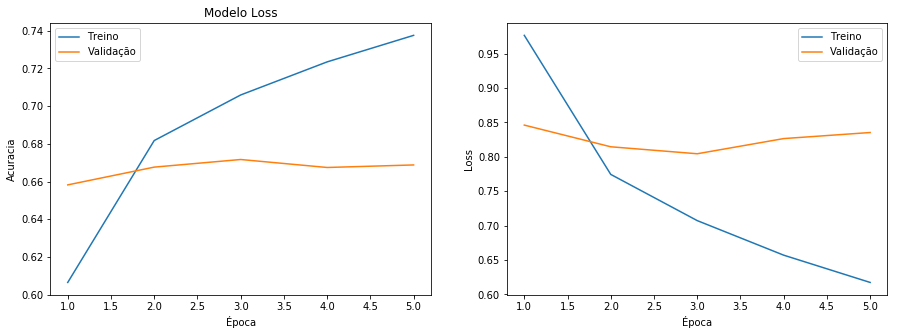

CPU times: user 17min 58s, sys: 49.5 s, total: 18min 47s
Wall time: 9min 44s

Análise do melhor modelo:
Acurácia [67.9928246524441, 67.3265423793965, 66.87383866213878, 67.33307702165834, 67.73036011790336, 67.72395232602845, 67.25408522909323, 67.77749295052551, 67.76467572417329, 67.16867469879519]
Acurácia media: 67.49%


In [15]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits=10, shuffle = True)

hist_acu = []




df = pd.read_csv('/content/drive/My Drive/intelivix/train.tsv', delimiter='\t')
pd.set_option('display.max_colwidth', -1)
X = df['Texto']
y = to_categorical(df['Sentimento'])
num_classes = df['Sentimento'].nunique()

for train_index, test_index in kf.split(X,np.argmax(y,axis=1)):  
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index] 
  
  #Extraindo características do dataset
  X_train, X_test = myTokenizer(X_train,X_test)
  X_train, X_test = mySquence(X_train,X_test)
    
  
  # Usando LSMT -> Algoritmo I 
  max_features = 15000
  embed_dim = 100
  model = get_model(max_features, embed_dim)
  %time model_train(model)
  # Melhor maquina
  print("\nAnálise do melhor modelo:")
  adress = '/content/drive/My Drive/intelivix/melhorModelo.hdf5'
  model.load_weights(adress)
  predicted =  model.predict_classes(X_test, batch_size=batch_size, verbose=0) 
  hist_acu.append(accuracy_score(np.argmax(y_test,axis=1),predicted)*100)
  
    
#   #Algoritmo II
#   # embedding matrix
#   EMBEDDING_FILE = '/content/drive/My Drive/intelivix/glove.6B.300d.txt'
#   adress = '/content/drive/My Drive/intelivix/melhorModelo.hdf5'
#   embed_dim = 300 #word vector dim
#   max_features, embedding_matrix = get_embed_mat(EMBEDDING_FILE)
#   # train the model
#   model = get_model_glove(max_features, embed_dim, embedding_matrix)
#   earlyStopping = EarlyStopping(monitor='val_acc', patience=2, verbose=1, mode='max')
#   mcp_save = ModelCheckpoint(adress,  monitor='val_acc',save_best_only=True, mode='max',verbose = 1)
#   %time model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=2, callbacks=[earlyStopping,mcp_save], validation_data=(X_test, y_test))
#   # Melhor maquina
#   print("\nAnálise do melhor modelo:")
#   model.load_weights(adress)
#   predicted =  model.predict_classes(X_test, batch_size=batch_size, verbose=0) 
#   hist_acu.append(accuracy_score(np.argmax(y_test,axis=1),predicted)*100)
print("Acurácia",hist_acu)
print("Acurácia media: {:0.2f}%".format(sum(hist_acu)/len(hist_acu)))
  
  
  